<h1><center><span style="font-size:50px"><u><b>Data Analysis of Loghub</b></u></span></center></h1>


<b><span style="font-size:24px"><span style = "color:red"><u>About Loghub </u> :- </span></span></b>


<span style="font-size:18px">Logs have been widely adopted in software system development and maintenance because of the rich runtime information they record. In recent years, the increase of software size and complexity leads  to the rapid growth of the volume of logs. To handle these large volumes of logs efficiently and effectively, a line of research focuses on developing intelligent and automated log analysis techniques.In particular, loghub provides 19 real-world log datasets collected from a wide range of software systems, including distributed systems, supercomputers, operating systems, mobile systems, server applications, and standalone software.</span>

<span style="font-size:20px">The loghub
datasets are available <a href = "https://github.com/logpai/loghub">here</a></span>.

In [164]:
#importing required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Reading the data as a csv file..</b>

In [165]:
df = pd.read_csv('HealthApp_2k.log_structured.csv')
df.head() #this represents some top entries of the data

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


<center><span style="font-size:30px"><b><u>Data</u> <u>Preprocessing</u></b></span></center>

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [167]:
df.isnull().sum()

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64

As we can see that there is No <b>NULL</b> value present so we can proceed futher without removing Null values...

In [168]:
df['Time']

0       20171223-22:15:29:606
1       20171223-22:15:29:615
2       20171223-22:15:29:633
3       20171223-22:15:29:635
4       20171223-22:15:29:635
                ...          
1995     20171224-0:58:53:985
1996      20171224-0:59:7:581
1997       20171224-1:0:0:794
1998       20171224-1:1:0:935
1999      20171224-1:2:35:789
Name: Time, Length: 2000, dtype: object

In [169]:
# Convert the 'Timestamp' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df = df.sort_values(by='Time')
df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data
...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...


In [170]:
df['Component'].unique()

array(['Step_LSC', 'Step_StandReportReceiver', 'Step_StandStepCounter',
       'Step_SPUtils', 'Step_ExtSDM', 'Step_ScreenUtil',
       'Step_FlushableStepDataCache', 'HiH_HiAppUtil',
       'HiH_HiHealthBinder', 'HiH_HiHealthDataInsertStore',
       'HiH_DataStatManager', 'HiH_ListenerManager', 'HiH_HiSyncControl',
       'HiH_HiSyncUtil', 'HiH_', 'HiH_HiBroadcastUtil',
       'Step_StandStepDataManager', 'Step_DataCache', 'Step_HGNH',
       'Step_NotificationUtil'], dtype=object)

In [171]:
df["Content"].unique()

array(['onStandStepChanged 3579', 'onExtend:1514038530000 14 0 4',
       'onReceive action: android.intent.action.SCREEN_ON', ...,
       ' getTodayTotalDetailSteps = 1514046240000##0##549659##8661##16256##34961757',
       'setTodayTotalDetailSteps=1514046420000##0##549659##8661##16256##35149773',
       'checkCurrentDay a new day comes , reset basicSyncCondition, currentDay is 20171224 oldDay is 20171223'],
      dtype=object)

In [172]:
df['EventId'].unique()

array(['E42', 'E39', 'E41', 'E43', 'E12', 'E22', 'E58', 'E4', 'E3', 'E47',
       'E40', 'E53', 'E35', 'E44', 'E14', 'E1', 'E75', 'E72', 'E16',
       'E15', 'E32', 'E34', 'E49', 'E52', 'E37', 'E50', 'E2', 'E63',
       'E73', 'E74', 'E33', 'E31', 'E8', 'E7', 'E67', 'E62', 'E61', 'E6',
       'E64', 'E36', 'E25', 'E24', 'E28', 'E27', 'E23', 'E54', 'E51',
       'E29', 'E30', 'E60', 'E13', 'E59', 'E69', 'E65', 'E66', 'E21',
       'E68', 'E48', 'E19', 'E18', 'E26', 'E45', 'E9', 'E20', 'E70',
       'E17', 'E55', 'E56', 'E71', 'E46', 'E38', 'E57', 'E10', 'E11',
       'E5'], dtype=object)

<center><span style="font-size:30px"><b><u>Event</u> <u>Analysis</u></b></span></center>

In [173]:
event_counts = df['EventId'].value_counts()

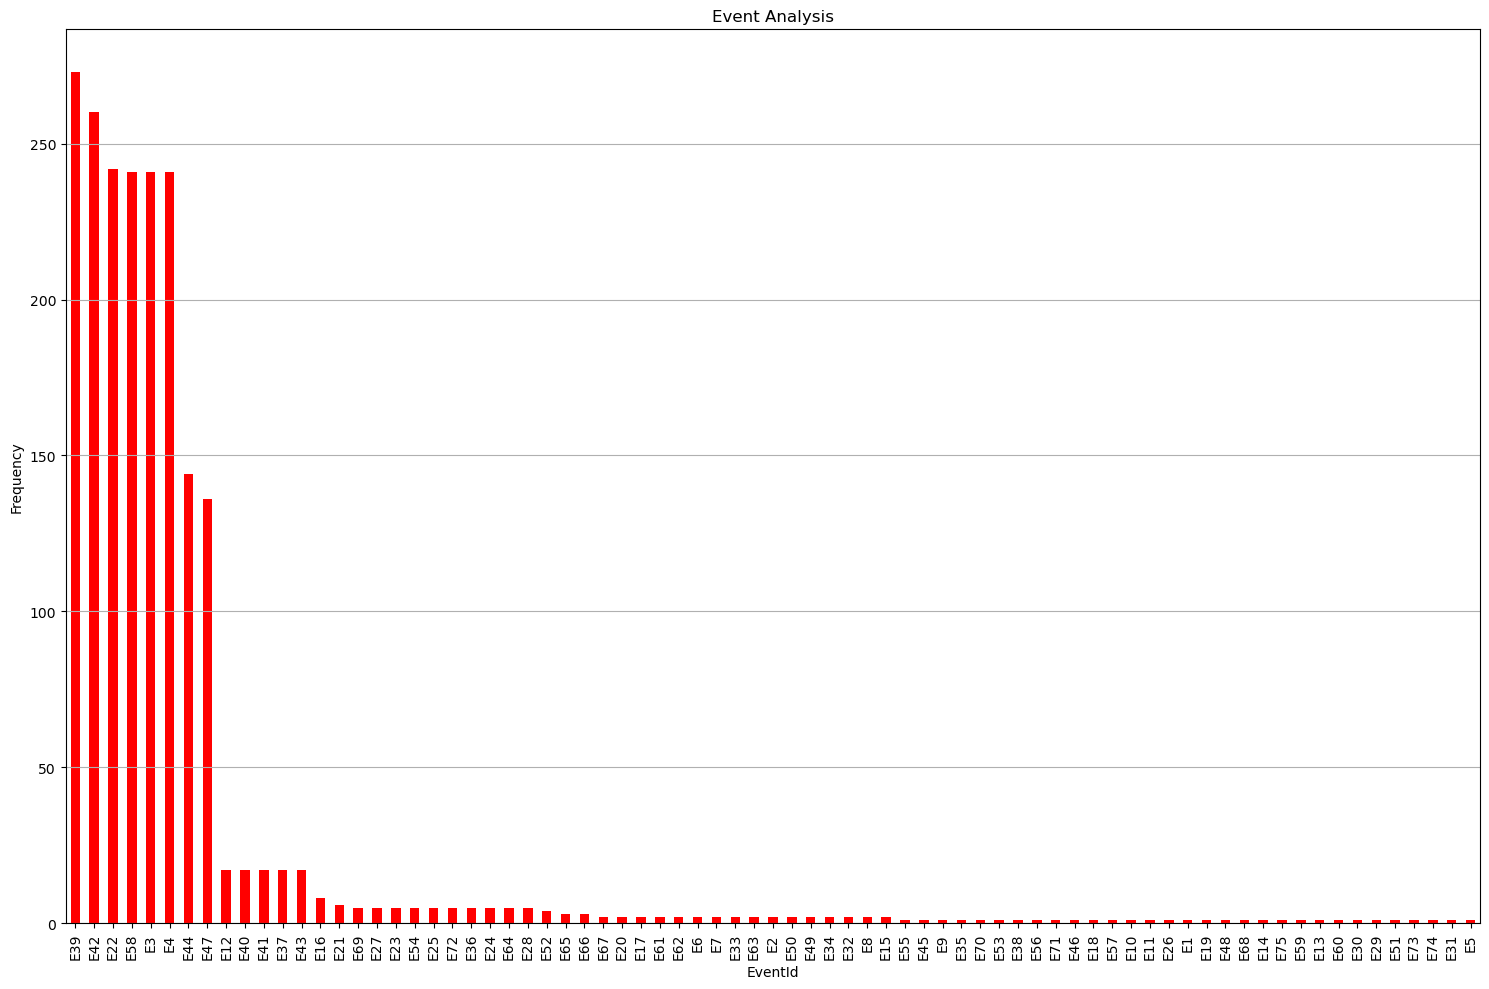

In [174]:
plt.figure(figsize=(15, 10))
event_counts.plot(kind='bar',color = 'red')
plt.title('Event Analysis')
plt.xlabel('EventId')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<center><span style="font-size:20px">This Plot signifies the frequency of each event that is exactly how many does a particular event occur.</span></center>

<center><span style="font-size:30px"><b><u>Frequency</u> <u>of</u> <u>Occuring</u> <u>of</u> <u>Events</u></b></span></center>

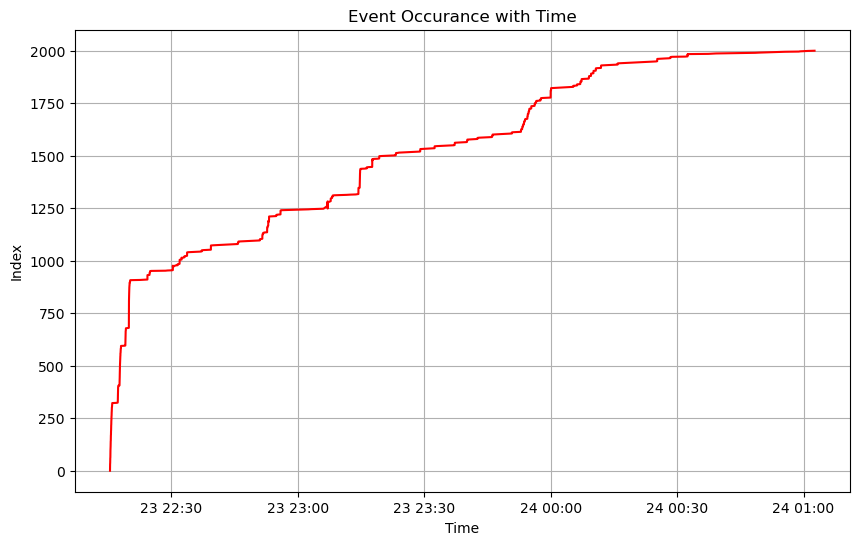

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df.index, color='r')
plt.title('Event Occurance with Time')
plt.xlabel('Time')
plt.ylabel('Index')
plt.grid(True)
plt.show()

<center><span style="font-size:20px">This Plot signifies the occurence of each event with respect to time.</span></center>

<center><span style="font-size:30px"><b><u>Screen</u> <u>Time</u> <u>Analysis</u></b></span></center>

In [176]:
import re #regular expression library of python

In [177]:
event_ids_to_extract = ['E40', 'E41', 'E43']
# function to check whether the screen is closed or open
def extract_screen_status(content):
    matches = re.findall(r'(SCREEN_(OFF|ON))', content)
    return ','.join([match[0] for match in matches])

dfSCREEN=df
dfSCREEN['Screen_Status'] = df[df['EventId'].isin(event_ids_to_extract)]['Content'].apply(extract_screen_status)
dfSCREEN

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Screen_Status
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,NaN
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,NaN
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,SCREEN_ON
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,SCREEN_ON
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,NaN
...,...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,NaN


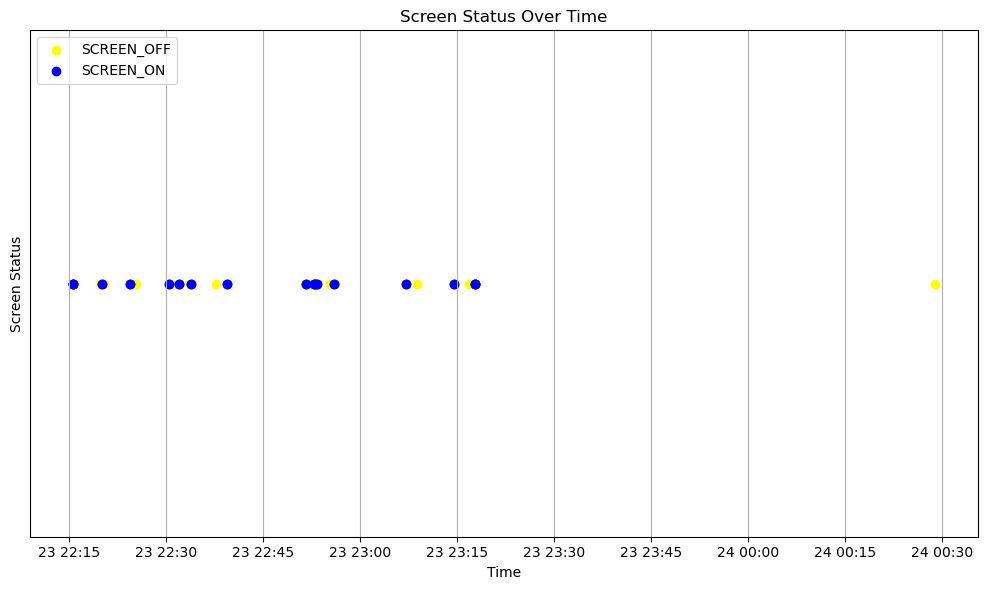

In [178]:
color_map = {
    'SCREEN_ON': 'blue',
    'SCREEN_OFF': 'yellow'
}

plt.figure(figsize=(10, 6))
for status, group in dfSCREEN.groupby('Screen_Status'):
    plt.scatter(group['Time'], [1] * len(group), label=status, color=color_map.get(status, 'blue'))

plt.xlabel('Time')
plt.ylabel('Screen Status')
plt.title('Screen Status Over Time')

plt.legend(loc='upper left')

plt.yticks([])
plt.grid(True)
plt.tight_layout()
plt.show()

<center><span style="font-size:20px">This Plot signifies at what time is the Screen <b>ON</b> or <b>OFF</b>.</span></center>

<center><span style="font-size:30px"><b><u>System</u> <u>Failure</u> <u>Events</u></b></span></center>

In [179]:
System_Failure = df[df['EventId'] == 'E54']
System_Failure

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Screen_Status
754,755,2017-12-23 22:19:58.428,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,sendSyncFailedBroadcast,NaN
794,795,2017-12-23 22:19:58.518,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,sendSyncFailedBroadcast,NaN
1014,1015,2017-12-23 22:32:28.801,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,sendSyncFailedBroadcast,NaN
1544,1545,2017-12-23 23:32:28.796,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,sendSyncFailedBroadcast,NaN
1982,1983,2017-12-24 00:32:28.806,HiH_HiBroadcastUtil,30002312,sendSyncFailedBroadcast,E54,sendSyncFailedBroadcast,NaN


<Axes: xlabel='Time', ylabel='LineId'>

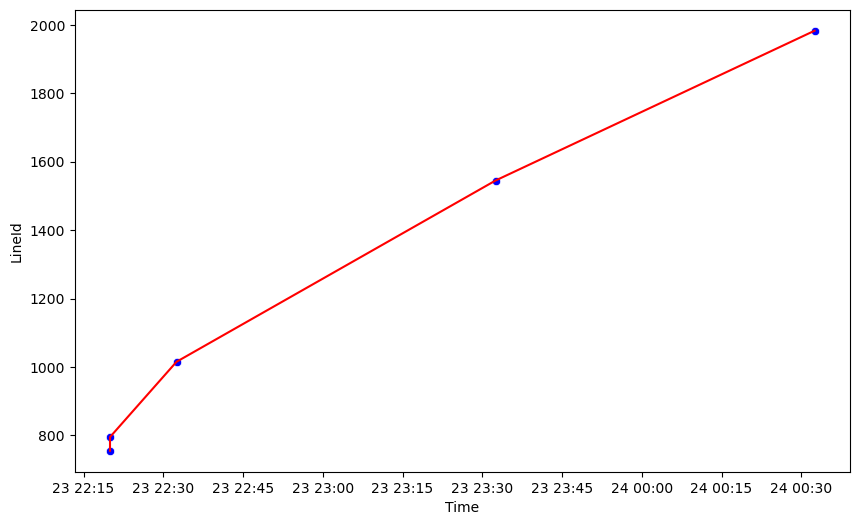

In [180]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'Time', y = 'LineId',color = 'red',data = System_Failure)
sns.scatterplot(x = 'Time', y = 'LineId',color = 'blue',data = System_Failure)
# plt.grid(True)
# plt.tight_layout()

<center><span style="font-size:20px">This Plot signifies at what time does the system <b>CRASHES</b>.</span></center>

<center><span style="font-size:30px"><b><u>Altitude</u> <u>Analysis</u></b></span></center>

In [181]:
Altitude = df[df['EventId'] == 'E3'][['Time', 'EventId','Content']]
Altitude['totalAltitude'] = Altitude['Content'].str.extract(r'totalAltitude=(\d+)')[0].astype(float)
Altitude

,Time,EventId,Content,totalAltitude
9,2017-12-23 22:15:29.648,E3,calculateAltitudeWithCache totalAltitude=240,240.0
18,2017-12-23 22:15:29.962,E3,calculateAltitudeWithCache totalAltitude=240,240.0
25,2017-12-23 22:15:30.641,E3,calculateAltitudeWithCache totalAltitude=240,240.0
32,2017-12-23 22:15:31.160,E3,calculateAltitudeWithCache totalAltitude=240,240.0
39,2017-12-23 22:15:32.162,E3,calculateAltitudeWithCache totalAltitude=240,240.0
...,...,...,...,...
1928,2017-12-24 00:11:57.450,E3,calculateAltitudeWithCache totalAltitude=0,0.0
1938,2017-12-24 00:15:53.292,E3,calculateAltitudeWithCache totalAltitude=0,0.0
1954,2017-12-24 00:25:16.445,E3,calculateAltitudeWithCache totalAltitude=0,0.0
1960,2017-12-24 00:25:17.445,E3,calculateAltitudeWithCache totalAltitude=0,0.0


In [182]:
Altitude['totalAltitude'].unique()

array([240.,   0.])

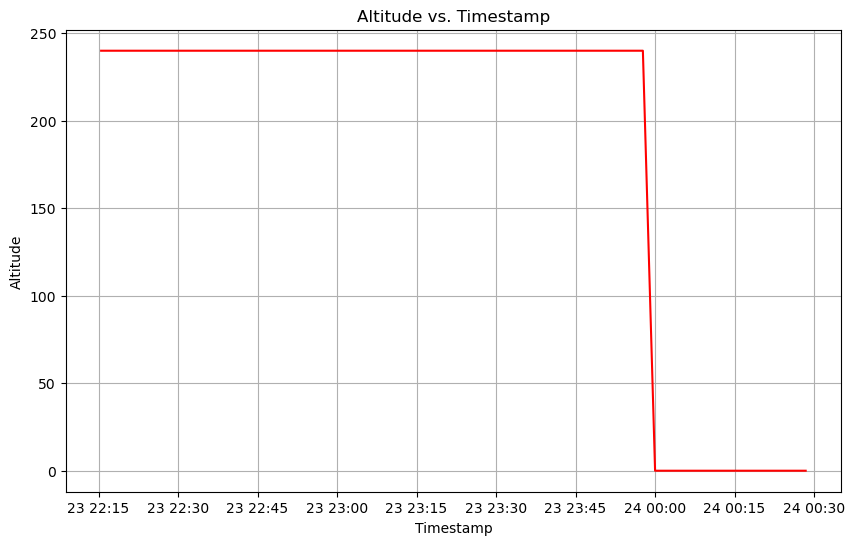

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(Altitude['Time'], Altitude['totalAltitude'], color='red')
plt.xlabel('Timestamp')
plt.ylabel('Altitude')
plt.title('Altitude vs. Timestamp')
plt.grid(True)
plt.show()

<center><span style="font-size:20px">Plot of various <b>Altitudes</b> according to various <b>Timestamps</b>.</span></center>

<center><span style="font-size:30px"><b><u>Calories</u> <u>Analysis</u></b></span></center>

In [184]:
Calories = df[df['EventId'] == 'E4'][['Time','Content', 'EventId']]
Calories['totalCalories'] = Calories['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(float)
Calories

,Time,Content,EventId,totalCalories
8,2017-12-23 22:15:29.645,calculateCaloriesWithCache totalCalories=126775,E4,126775.0
17,2017-12-23 22:15:29.959,calculateCaloriesWithCache totalCalories=126797,E4,126797.0
24,2017-12-23 22:15:30.639,calculateCaloriesWithCache totalCalories=126818,E4,126818.0
31,2017-12-23 22:15:31.157,calculateCaloriesWithCache totalCalories=126861,E4,126861.0
38,2017-12-23 22:15:32.156,calculateCaloriesWithCache totalCalories=126882,E4,126882.0
...,...,...,...,...
1927,2017-12-24 00:11:57.449,calculateCaloriesWithCache totalCalories=0,E4,0.0
1937,2017-12-24 00:15:53.292,calculateCaloriesWithCache totalCalories=0,E4,0.0
1953,2017-12-24 00:25:16.445,calculateCaloriesWithCache totalCalories=0,E4,0.0
1959,2017-12-24 00:25:17.445,calculateCaloriesWithCache totalCalories=0,E4,0.0


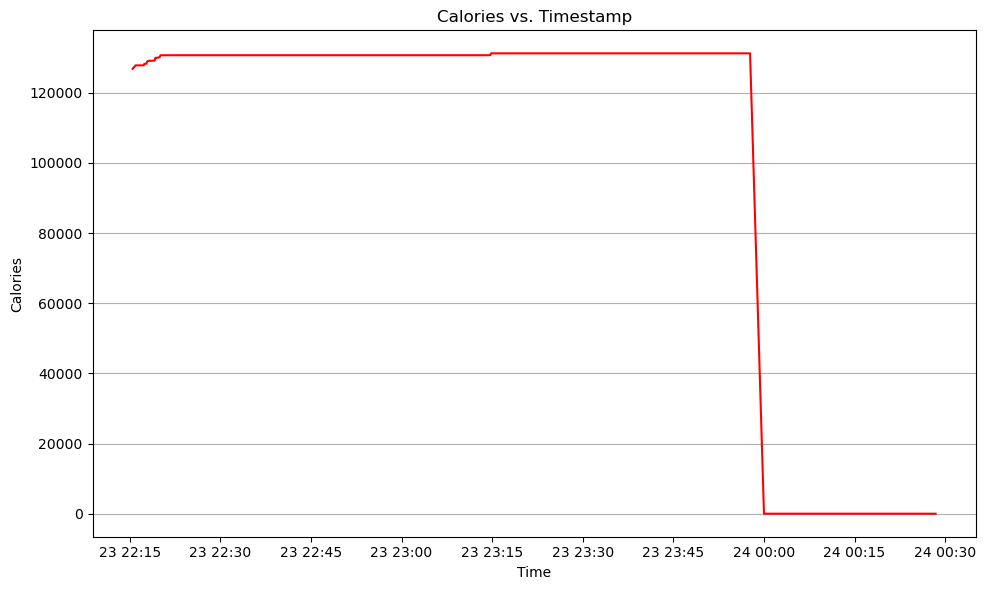

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(Calories['Time'], Calories['totalCalories'], color = 'red')
plt.xlabel('Time')
plt.ylabel('Calories')
plt.title('Calories vs. Timestamp')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<center><span style="font-size:20px">Plot of different <b>Calories</b> according to various <b>Timestamps</b>.</span></center>

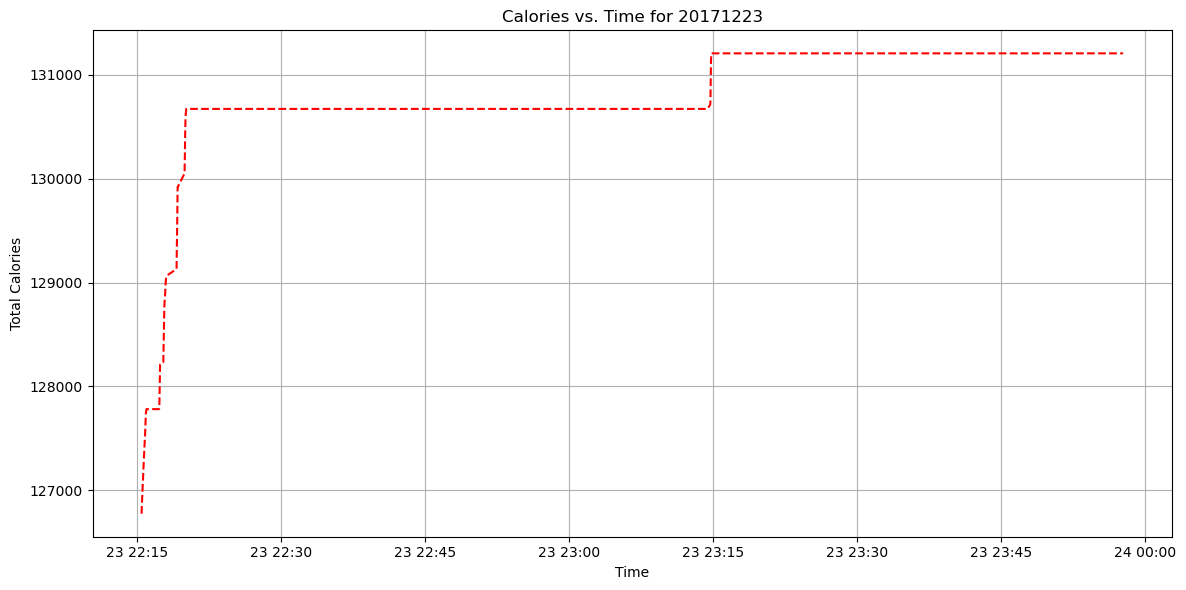

In [186]:
date_filter = '20171223'
filtered_df = Calories[Calories['Time'].dt.strftime('%Y%m%d') == date_filter]
plt.figure(figsize=(12, 6)) 
plt.plot(filtered_df['Time'], filtered_df['totalCalories'], linestyle='--', color='r')
plt.xlabel('Time')
plt.ylabel('Total Calories')
plt.title(f'Calories vs. Time for {date_filter}')
plt.grid(True)
plt.tight_layout()
plt.show()

<center><span style="font-size:20px"><b>Calories</b> chart of the day(23-12-2017).</span></center>

<center><span style="font-size:30px"><b><u>Step</u>-<u>count</u> <u>Analysis</u></b></span></center>

In [187]:
event_ids_to_extract = ['E42']
step_count = df[df['EventId'].isin(event_ids_to_extract)][['Time', 'EventId','Content']]
step_count

,Time,EventId,Content
0,2017-12-23 22:15:29.606,E42,onStandStepChanged 3579
7,2017-12-23 22:15:29.636,E42,onStandStepChanged 3579
12,2017-12-23 22:15:29.738,E42,onStandStepChanged 3579
13,2017-12-23 22:15:29.792,E42,onStandStepChanged 3580
20,2017-12-23 22:15:30.331,E42,onStandStepChanged 3581
...,...,...,...
1923,2017-12-24 00:11:57.141,E42,onStandStepChanged 3786
1933,2017-12-24 00:15:52.983,E42,onStandStepChanged 3786
1949,2017-12-24 00:25:16.137,E42,onStandStepChanged 3786
1955,2017-12-24 00:25:17.137,E42,onStandStepChanged 3786


In [188]:
daily_step_counts = step_count.groupby(step_count['Time'].dt.date).size()
daily_step_counts 

Time
2017-12-23    236
2017-12-24     24
dtype: int64

In [189]:
event_ids_to_extract = ['E42']
steps = df[df['EventId'].isin(event_ids_to_extract)][['Time', 'EventId','Content']]
steps['StepCount'] = steps['Content'].str.extract(r'onStandStepChanged (\d+)')[0].astype(int)
steps

,Time,EventId,Content,StepCount
0,2017-12-23 22:15:29.606,E42,onStandStepChanged 3579,3579
7,2017-12-23 22:15:29.636,E42,onStandStepChanged 3579,3579
12,2017-12-23 22:15:29.738,E42,onStandStepChanged 3579,3579
13,2017-12-23 22:15:29.792,E42,onStandStepChanged 3580,3580
20,2017-12-23 22:15:30.331,E42,onStandStepChanged 3581,3581
...,...,...,...,...
1923,2017-12-24 00:11:57.141,E42,onStandStepChanged 3786,3786
1933,2017-12-24 00:15:52.983,E42,onStandStepChanged 3786,3786
1949,2017-12-24 00:25:16.137,E42,onStandStepChanged 3786,3786
1955,2017-12-24 00:25:17.137,E42,onStandStepChanged 3786,3786


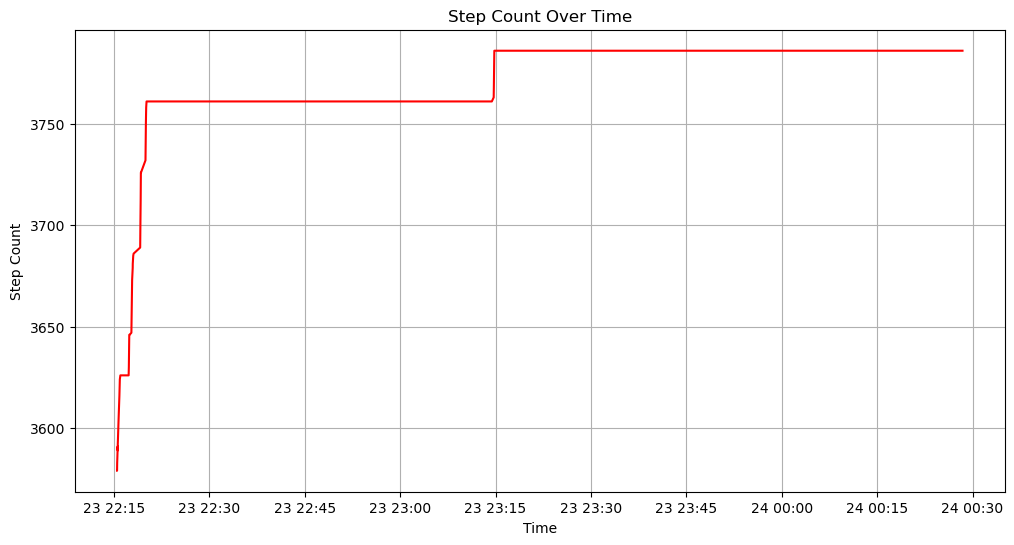

In [190]:
plt.figure(figsize=(12, 6))
plt.plot(steps['Time'], steps['StepCount'], color = 'red')
plt.title('Step Count Over Time')
plt.xlabel('Time')
plt.ylabel('Step Count')
plt.grid(True)
plt.show()

<center><span style="font-size:20px">This Plot signifies number of <b>Step-counts</b> along various span of time.</span></center>

In [197]:
day_wise_activity = steps.groupby(step_count['Time'].dt.date).size()
day_wise_activity = day_wise_activity.sort_values(ascending=True)
day_wise_activity

Time
2017-12-24     24
2017-12-23    236
dtype: int64

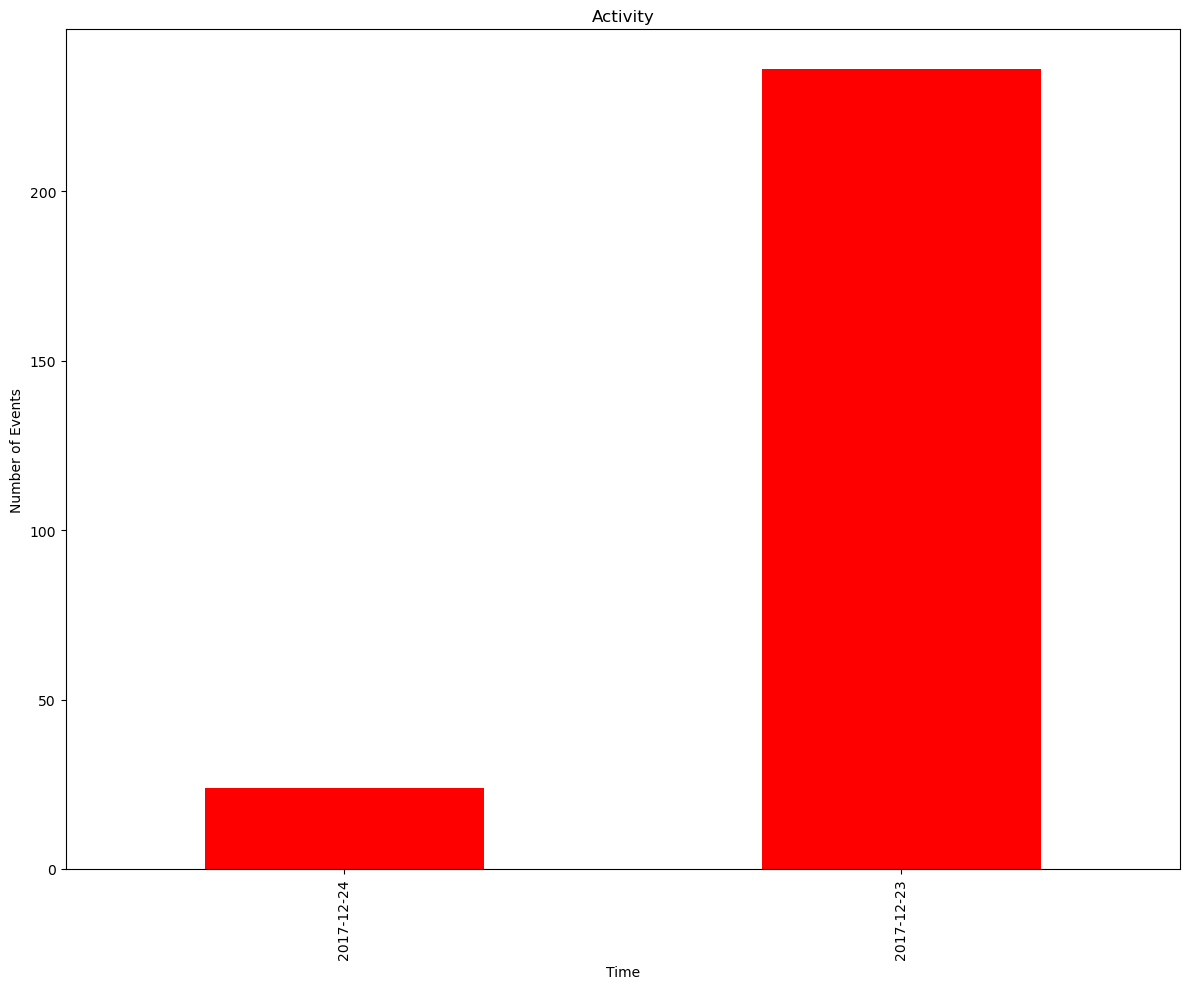

In [210]:
plt.figure(figsize=(12,10))
day_wise_activity.plot(kind='bar',color = 'red')
plt.title('Activity')
plt.xlabel('Time',loc = 'center')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

<center><span style="font-size:20px"><b>Bar Plot</b> of <b>Events</b> in each Day.</span></center>

In [105]:
s = df[df['EventId'] == 'E39']
s

,LineId,Time,Component,Pid,Content,EventId,Screen_Status
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,NaN
11,12,2017-12-23 22:15:29.737,Step_LSC,30002312,onExtend:1514038530000 0 0 4,E39,NaN
14,15,2017-12-23 22:15:29.800,Step_LSC,30002312,onExtend:1514038530000 1 0 4,E39,NaN
21,22,2017-12-23 22:15:30.335,Step_LSC,30002312,onExtend:1514038531000 1 0 4,E39,NaN
28,29,2017-12-23 22:15:30.858,Step_LSC,30002312,onExtend:1514038531000 2 0 4,E39,NaN
...,...,...,...,...,...,...,...
1924,1925,2017-12-24 00:11:57.149,Step_LSC,30002312,onExtend:1514045517000 0 0 0,E39,NaN
1934,1935,2017-12-24 00:15:52.990,Step_LSC,30002312,onExtend:1514045753000 0 0 0,E39,NaN
1950,1951,2017-12-24 00:25:16.146,Step_LSC,30002312,onExtend:1514046316000 0 0 5,E39,NaN
1956,1957,2017-12-24 00:25:17.149,Step_LSC,30002312,onExtend:1514046317000 0 0 0,E39,NaN
